<h1 style = "font-size:3rem;color:blue;"> Drifter Data Analysis</h1>



Data formatting for Biogeochemical Drifter field observations


In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import datetime

import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

Read in data and parse by column header


In [14]:
filename = '24102400'

fullname = filename+'.csv'

filepath = os.path.join('D:', fullname)

df = pd.read_csv(filepath, parse_dates = [[0, 1]], header = None)

df.columns = ['time', 'elapsed time (sec)', 'lat_raw', 'N or S', 'lon_raw', 'E or W', 'altitude', 'speed', 'angle', 'pH', 'Temperature (C)', 'DO (mg/L)', 'Conductivity (uS/cm)']

df.head()

,time,elapsed time (sec),lat_raw,N or S,lon_raw,E or W,altitude,speed,angle,pH,Temperature (C),DO (mg/L),Conductivity (uS/cm)
0,2024-10-24 18:56:35.640,2,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.00,0.00,0.00,0.0
1,2024-10-24 18:56:37.640,4,0.0,NaN,0.0,NaN,0.0,0.0,0.0,3.00,23.71,12.60,0.0
2,2024-10-24 18:56:39.640,6,0.0,NaN,0.0,NaN,0.0,0.0,0.0,2.95,23.73,7.38,0.0
3,2024-10-24 18:56:41.640,8,0.0,NaN,0.0,NaN,0.0,0.0,0.0,2.62,23.87,7.40,0.0
4,2024-10-24 18:56:43.640,10,0.0,NaN,0.0,NaN,0.0,0.0,0.0,2.29,24.34,7.38,0.0


In [16]:
# GPS spits out lat DDMM.MMMM, lon DDDMM.MMMM, so additional processing required
def lat_convert(lat_badfmt):
    lat_badfmt = str(lat_badfmt)
    lat_DD = int(float(lat_badfmt)/100) # get DDD part
    lat_MM = float(lat_badfmt)-lat_DD*100 # get MM.MMM part
    lat_deg = float(lat_DD)+float(lat_MM)/60 # add minutes divided by 60 to degrees
    return lat_deg

def lon_convert(lon_badfmt):
    lon_badfmt = str(lon_badfmt)
    lon_DD = int(float(lon_badfmt)/100) # get DDD part
    lon_MM = float(lon_badfmt)-lon_DD*100 # get MM.MMM part
    lon_deg = float(lon_DD)+float(lon_MM)/60 # add minutes divided by 60 to degrees
    return lon_deg

# Do the conversion on real data
df['lat'] = df['lat_raw'].apply(lat_convert)
df['lon'] = df['lon_raw'].apply(lon_convert)

# South should be negative
south = df['N or S'] == 'S'
df['lat'][south] *= -1 

# West should be negative
west = df['E or W'] == 'W'
df['lon'][west] *= -1 

# Take a look
df.head()

C:\Users\Stephen\AppData\Local\Temp\ipykernel_5248\251891894.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lat'][south] *= -1
C:\Users\Stephen\AppData\Local\Temp\ipykernel_5248\251891894.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lon'][west] *= -1


,time,elapsed time (sec),lat_raw,N or S,lon_raw,E or W,altitude,speed,angle,pH,Temperature (C),DO (mg/L),Conductivity (uS/cm),lat,lon
0,2024-10-24 18:56:35.640,2,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0
1,2024-10-24 18:56:37.640,4,0.0,NaN,0.0,NaN,0.0,0.0,0.0,3.00,23.71,12.60,0.0,0.0,0.0
2,2024-10-24 18:56:39.640,6,0.0,NaN,0.0,NaN,0.0,0.0,0.0,2.95,23.73,7.38,0.0,0.0,0.0
3,2024-10-24 18:56:41.640,8,0.0,NaN,0.0,NaN,0.0,0.0,0.0,2.62,23.87,7.40,0.0,0.0,0.0
4,2024-10-24 18:56:43.640,10,0.0,NaN,0.0,NaN,0.0,0.0,0.0,2.29,24.34,7.38,0.0,0.0,0.0


In [18]:
def plot_gps_points(lon, lat):
     fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}) 
     stamen_terrain = cimgt.Stamen('terrain')
     ax.add_image(stamen_terrain, 8)
    
    # Plot the GPS points
     ax.plot(lon, lat, 'bo', markersize=5, transform=ccrs.PlateCarree())
    
    # Add gridlines
     gl = ax.gridlines(draw_labels=True)
     gl.xlabels_top = False
     gl.ylabels_right = False
     gl.xformatter = LONGITUDE_FORMATTER
     gl.yformatter = LATITUDE_FORMATTER
    
     plt.show(df.lon,df.lat)


(-77.865, -77.87)

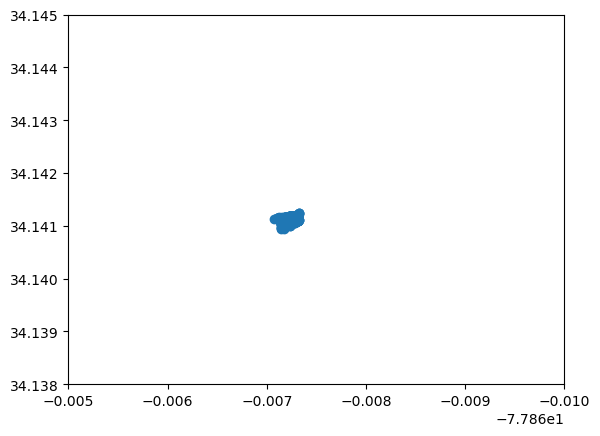

In [20]:
plt.scatter(df.lon, df.lat)
plt.ylim((34.138,34.145))
plt.xlim((-77.865,-77.87))

Text(0, 0.5, 'pH')

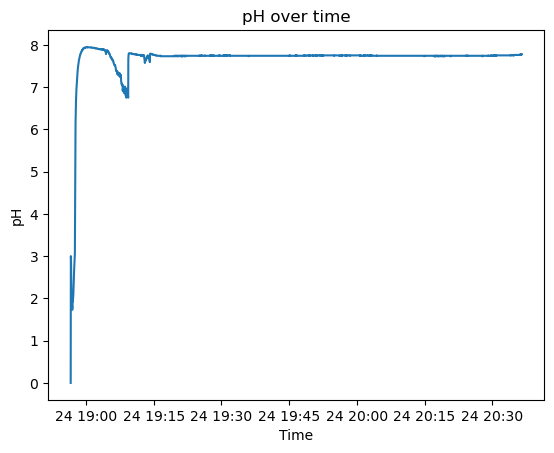

In [34]:
time = df['time']
ph = df['pH']

plt.plot(time,ph)
plt.title('pH over time')
plt.xlabel('Time')
plt.ylabel('pH')



Text(0, 0.5, 'DO (mg/L)')

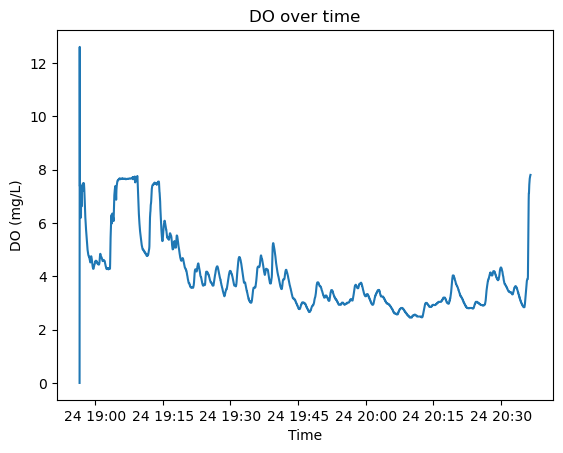

In [36]:
DO = df['DO (mg/L)']

plt.plot(time,DO)
plt.title('DO over time')
plt.xlabel('Time')
plt.ylabel('DO (mg/L)')

Text(0, 0.5, 'Temperature (C)')

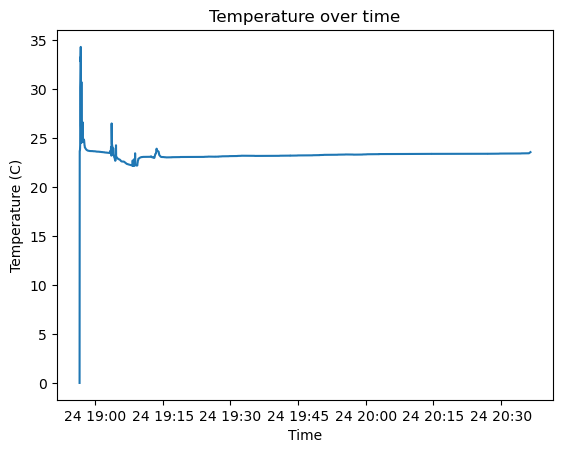

In [38]:
temp = df['Temperature (C)']

plt.plot(time,temp)
plt.title('Temperature over time')
plt.xlabel('Time')
plt.ylabel('Temperature (C)')

Text(0, 0.5, 'Conductivity (uS/cm)')

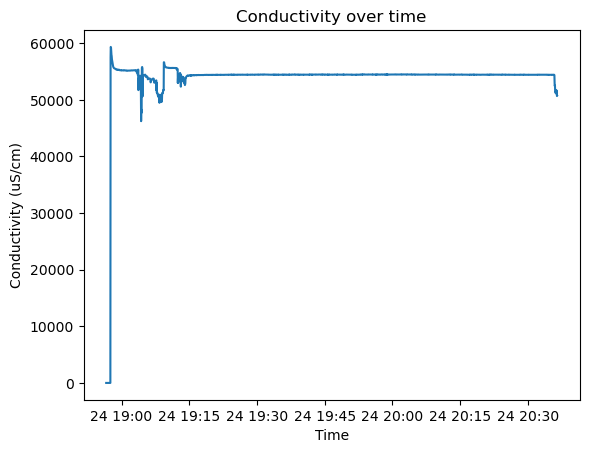

In [40]:
cond = df['Conductivity (uS/cm)']

plt.plot(time,cond)
plt.title('Conductivity over time')
plt.xlabel('Time')
plt.ylabel('Conductivity (uS/cm)')